模拟对一个新闻进行判断其是真新闻还是假新闻，主要步骤如下：
1-1.背景分析
1-2.判定与假设
1-3.准备工作
2-1.数据导入
2-2.数据检查
2-3.数据处理与可视化
3-1.特征分析
3-2.特征处理可视化
4.模型选择与训练
5.测试模型与总结

1.1背景分析

为什么要判别新闻的真假？
    1’虚假新闻具有误导性，容易使人产生错误判断。
    2‘虚假新闻可能会损害个人或团体的名誉，甚至可能引发社会不公。通过判别真假新闻，我们可以维护公正，保护无辜者免受伤害。
    3‘真实的新闻是知识和信息的重要来源，通过判别真假新闻，可以确保获取的信息是准确和有用的。
    总之，进行真假新闻的判别对于我们生活在这个信息爆炸的时代来说，是非常必要的。我们需要批判性地思考，检查信息的来源，验证事实，以便我们能够做出基于真实信息的决策。

1-2.判定与假设

通过观察数据集True.csv和Fake.csv发现一共有4个变量，分别为title,text,subject,date即新闻的标签、文本、分类和发布日期
无论真假新闻，最关键的部分都是文本内容和标题，所以后续工作要有意识地关注这两个部分，突破口很有可能在这里找到，关于类别和日期，因为无论什么类别的新闻、什么时候发布的新闻，其真假都是不确定的，或许这两个变量对真假新闻的判别或许作用不大甚至会影响结果。

1.3准备工作

首先引入需要使用的包：数据处理库、sklearn算法库、绘图工具
再从本地将数据集导入

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
font = FontProperties(fname=r'./msyh.ttf', size=12)


2-1.数据导入
从本地导入数据集True.csv和Fake.csv

In [212]:
true_df = pd.read_csv('./True.csv')
fake_df = pd.read_csv('./Fake.csv')

2-2.数据检查

查看数据集中每一列代表什么元素，有没有空值即数据缺失

In [213]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [214]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

设定true、fake数据集的标签，真0假1；
合并两个数据集并打乱，打印出基本信息和前十行数据进行检查

In [215]:
true_df['label'] = 0
fake_df['label'] = 1

df = pd.concat([true_df, fake_df])
df = df.sample(frac=1).reset_index(drop=True)

print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


,title,text,subject,date,label
0,Britain unconditionally committed to maintaini...,LONDON (Reuters) - Britain said it was uncondi...,worldnews,"September 12, 2017",0
1,MSNBC HOST Compares Getting Close to Trump to ...,President Trump came out today and said he doe...,left-news,"Jun 22, 2017",1
2,33-Yr Old Skier LINDSEY VONN Says She Won’t Re...,"Has there ever been a US Olympic athlete who, ...",left-news,"Dec 7, 2017",1
3,South Dakota governor considers transgender ba...,(Reuters) - South Dakota would be the first U....,politicsNews,"February 17, 2016",0
4,Trump Put An American Flag On His Birthday Tw...,It seems that Donald Trump is often incapable ...,News,"April 27, 2017",1
5,Lebanon parliament speaker proposes vote by ye...,BEIRUT (Reuters) - Lebanon s parliament speake...,worldnews,"September 18, 2017",0
6,UNHCR alarmed at violence against Rohingyas in...,COLOMBO (Reuters) - The United Nations on Wedn...,worldnews,"September 27, 2017",0
7,‘Never Trump’: Another Well-Known GOP Figure ...,Despite some noises being made by some Republi...,News,"June 25, 2016",1
8,Senate confirms Kelly as Trump's Homeland Secu...,WASHINGTON (Reuters) - The U.S. Senate voted o...,politicsNews,"January 20, 2017",0
9,Will ‘Trumponomics’ Bankrupt America?,21st Century Wire says F. William Engdahl is a...,Middle-east,"May 4, 2017",1


2-3.数据处理与可视化

绘制真、假新闻中新闻类别的横向直方图

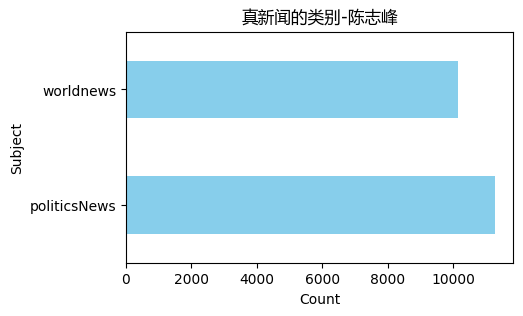

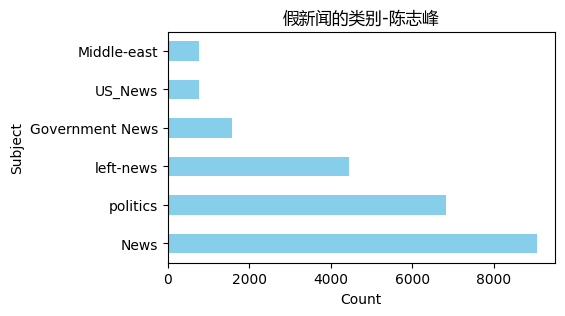

In [216]:
# 从True.csv和Fake.csv中分别提取subject列
true_subjects = true_df['subject']
fake_subjects = fake_df['subject']

# 统计元素种类和个数
true_subject_counts = true_subjects.value_counts()
fake_subject_counts = fake_subjects.value_counts()

# 绘制True.csv的横向直方图
plt.figure(figsize=(5,3))
true_subject_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.title('真新闻的类别-陈志峰', fontproperties=font)
plt.show()

# 绘制Fake.csv的横向直方图
plt.figure(figsize=(5,3))
fake_subject_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.title('假新闻的类别-陈志峰', fontproperties=font)
plt.show()

绘制真、假新闻中发布年份的横向直方图

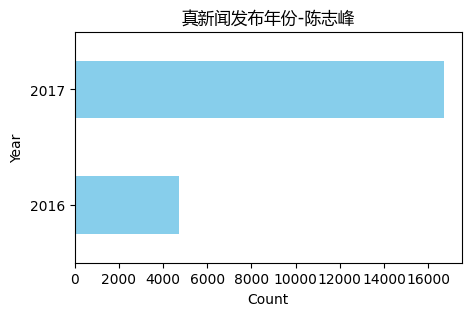

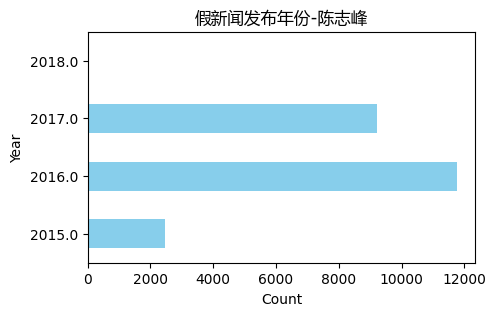

In [217]:
import matplotlib.pyplot as plt

# 从True.csv和Fake.csv中分别提取date列，并转换为datetime类型
true_dates = pd.to_datetime(true_df['date'], format="mixed", errors='coerce')
fake_dates = pd.to_datetime(fake_df['date'], format="mixed", errors='coerce')

# 提取年份
true_years = true_dates.dt.year
fake_years = fake_dates.dt.year

# 统计元素种类和个数
true_year_counts = true_years.value_counts().sort_index()
fake_year_counts = fake_years.value_counts().sort_index()

# 绘制True.csv的横向直方图
plt.figure(figsize=(5,3))
true_year_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('真新闻发布年份-陈志峰', fontproperties=font)
plt.show()

# 绘制Fake.csv的横向直方图
plt.figure(figsize=(5,3))
fake_year_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('假新闻发布年份-陈志峰', fontproperties=font)
plt.show()

提取真假新闻标题中出现频率最多的10个词并绘制词云

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


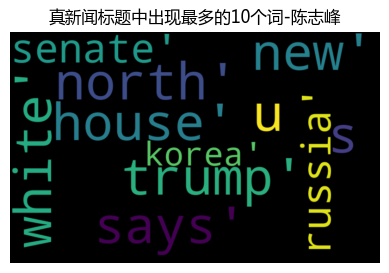

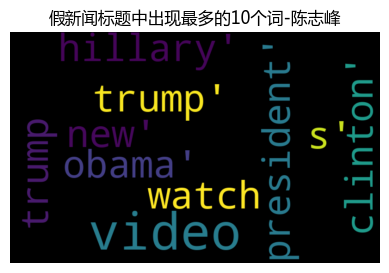

In [218]:
# 下载停用词
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 从True.csv和Fake.csv中分别提取title列
true_titles = true_df['title']
fake_titles = fake_df['title']

# 分词并移除停用词
true_words = [word for title in true_titles for word in title.lower().split() if word not in stop_words]
fake_words = [word for title in fake_titles for word in title.lower().split() if word not in stop_words]

# 统计单词频率
true_word_counts = Counter(true_words)
fake_word_counts = Counter(fake_words)

# 提取出现次数最高的10个单词
top_true_words = true_word_counts.most_common(10)
top_fake_words = fake_word_counts.most_common(10)

# 绘制词云
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(top_true_words))
plt.figure(figsize=(5, 3))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('真新闻标题中出现最多的10个词-陈志峰', fontproperties=font)
plt.show()

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(top_fake_words))
plt.figure(figsize=(5, 3))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('假新闻标题中出现最多的10个词-陈志峰', fontproperties=font)
plt.show()

提取真假新闻文本中出现频率最多的20个词并绘制词云

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


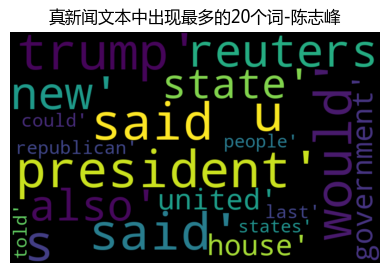

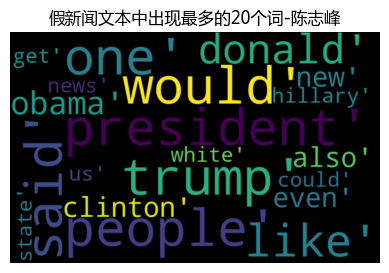

In [219]:
# 下载停用词
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 从True.csv和Fake.csv中分别提取text列
true_titles = true_df['text']
fake_titles = fake_df['text']

# 分词并移除停用词
true_words = [word for title in true_titles for word in title.lower().split() if word not in stop_words]
fake_words = [word for title in fake_titles for word in title.lower().split() if word not in stop_words]

# 统计单词频率
true_word_counts = Counter(true_words)
fake_word_counts = Counter(fake_words)

# 提取出现次数最高的10个单词
top_true_words = true_word_counts.most_common(20)
top_fake_words = fake_word_counts.most_common(20)

# 绘制词云
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(top_true_words))
plt.figure(figsize=(5, 3))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('真新闻文本中出现最多的20个词-陈志峰', fontproperties=font)
plt.show()

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(top_fake_words))
plt.figure(figsize=(5, 3))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('假新闻文本中出现最多的20个词-陈志峰', fontproperties=font)
plt.show()

3-1.特征分析
通过数据的可视化，可以直观地看出在数据集的各个变量中，有些变量重合概率肉眼可见的高，可能不是真正需要的数据，如果能进一步判断，就可以找到需要的特征与不需要的特征以便进行后续工作。

3-2.特征处理与可视化

计算真假新闻各变量的重合概率，以此决定是否筛选掉某些变量；
要计算的概率有：
真假新闻发布分类的重合概率
真假新闻发布年份的重合概率
计算真假新闻标题中出现最多次数的10个词语的重合概率
计算真假新闻文本中出现最多次数的10个词语的重合概率
最后将这几个概率绘制成散点图观察

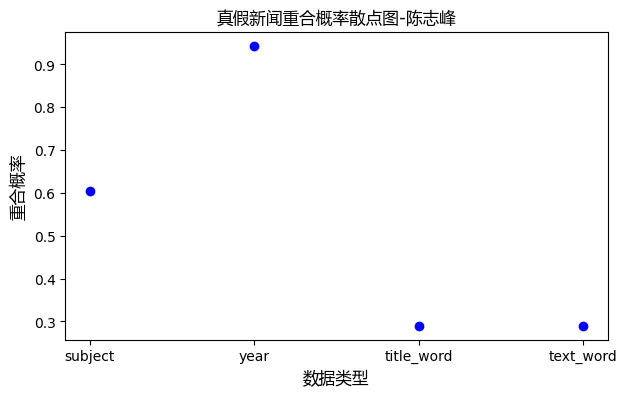

In [220]:
# 计算真假新闻发布分类的重合概率

# 计算'politicsNews'元素的个数
fake_subjects_counts = Counter(fake_subjects)
fake_total_counts = 0
for subject, count in fake_subjects_counts.items():
    if subject == 'politics':
        fake_total_counts += count
    elif subject == 'News':
        fake_total_counts += count

true_subjects_counts = Counter(true_subjects)
politicsNews_count = 0
for subject, count in true_subjects_counts.items():
    if subject == 'politicsNews':
        politicsNews_count = count

# 计算总元素个数
fake_ele_count = len(fake_subjects)
true_ele_count = len(true_subjects)
total_ele_count = fake_ele_count+true_ele_count

subject_overlap = (fake_total_counts + politicsNews_count) / total_ele_count

# 计算真假新闻发布年份的重合概率

# 计算2016、2017年真假新闻个数
true_year_counts = Counter(true_years)
true_year_count = 0
for year, count in true_year_counts.items():
    true_year_count += count

fake_year_counts = Counter(fake_years)
fake_year_count = 0
for year, count in fake_year_counts.items():
    if year == 2016.0:
        fake_year_count += count
    elif year == 2017.0:
        fake_year_count += count

# 计算总元素个数
true_ele_count = len(true_years)
fake_ele_count = len(fake_years)
total_ele_count = true_ele_count + fake_ele_count

# 计算重合个数
overlap_count_1617 = true_year_count + fake_year_count
# 计算真假新闻发布年份的重合概率
year_overlap = overlap_count_1617 / total_ele_count

# 提取真假新闻标题中出现最多次数的10个词
top_true_title_words = [word[0] for word in top_true_words]
top_fake_title_words = [word[0] for word in top_fake_words]

# 计算真假新闻标题中出现最多次数的10个词语的重合概率
title_word_overlap = len(set(top_true_title_words) & set(top_fake_title_words)) / len(set(top_true_title_words).union(set(top_fake_title_words)))

# 提取真假新闻文本中出现最多次数的10个词
top_true_text_words = [word[0] for word in top_true_words]
top_fake_text_words = [word[0] for word in top_fake_words]

# 计算真假新闻文本中出现最多次数的10个词语的重合概率
text_word_overlap = len(set(top_true_text_words) & set(top_fake_text_words)) / len(set(top_true_text_words).union(set(top_fake_text_words)))

# 将这四个概率绘制成散点图
plt.figure(figsize=(7, 4))
plt.scatter(['subject', 'year', 'title_word', 'text_word'], [subject_overlap, year_overlap, title_word_overlap, text_word_overlap], color='b')
plt.xlabel('数据类型', fontproperties=font)
plt.ylabel('重合概率', fontproperties=font)
plt.title('真假新闻重合概率散点图-陈志峰', fontproperties=font)
plt.show()


由散点图可以看出，真假新闻的发布年份、发布类别重合概率太高了，不利于我们训练模型进行判别真假新闻，所以将这两个变量筛去。

In [221]:
df.drop(['subject', 'date'], axis=1, inplace=True)
df.head(10)

,title,text,label
0,Britain unconditionally committed to maintaini...,LONDON (Reuters) - Britain said it was uncondi...,0
1,MSNBC HOST Compares Getting Close to Trump to ...,President Trump came out today and said he doe...,1
2,33-Yr Old Skier LINDSEY VONN Says She Won’t Re...,"Has there ever been a US Olympic athlete who, ...",1
3,South Dakota governor considers transgender ba...,(Reuters) - South Dakota would be the first U....,0
4,Trump Put An American Flag On His Birthday Tw...,It seems that Donald Trump is often incapable ...,1
5,Lebanon parliament speaker proposes vote by ye...,BEIRUT (Reuters) - Lebanon s parliament speake...,0
6,UNHCR alarmed at violence against Rohingyas in...,COLOMBO (Reuters) - The United Nations on Wedn...,0
7,‘Never Trump’: Another Well-Known GOP Figure ...,Despite some noises being made by some Republi...,1
8,Senate confirms Kelly as Trump's Homeland Secu...,WASHINGTON (Reuters) - The U.S. Senate voted o...,0
9,Will ‘Trumponomics’ Bankrupt America?,21st Century Wire says F. William Engdahl is a...,1


4.模型选择与训练
在这里，使用库函数自带的逻辑回归算法进行模型训练。
其中，将整个数据集划分为80%的训练集和20%的测试集分别用于训练模型和测试模型

In [222]:
from scipy.sparse import hstack

# 初始化TF-IDF向量化器
title_vectorizer = TfidfVectorizer(max_features=1000)
text_vectorizer = TfidfVectorizer(max_features=5000)
# 拟合并转换数据
title_tfidf = title_vectorizer.fit_transform(df['title'])
text_tfidf = text_vectorizer.fit_transform(df['text'])
# 合并title和text的TF-IDF特征
X = hstack([title_tfidf, text_tfidf])
y = df['label']

#将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [223]:
# 初始化逻辑回归模型
model = LogisticRegression(max_iter=1000)

# 训练模型
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [224]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 预测
y_pred = model.predict(X_test)

# 计算性能指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9938752783964365
Precision: 0.9961726557516479
Recall: 0.9921643371452774
F1 Score: 0.9941644562334218


In [225]:
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {'C':[0.01, 0.1, 1, 10, 100]} 

# 使用网格搜索调参
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 打印最佳参数
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'C': 100}


In [226]:
# 使用最佳参数初始化逻辑回归模型
best_model = LogisticRegression(max_iter=1000, **best_params)
best_model.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000)

5.测试模型与总结
使用测试集对训练的模型进行测试

In [227]:
from sklearn.metrics import precision_score, recall_score, f1_score
#计算参数调优后的准确率、精确率、召回率和F1得分
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 99.67
Precision: 0.9966130397967824
Recall: 0.9970351545955104
F1 Score: 0.9968240525089985


现在，定义一个用于判断真假新闻的函数进一步检测模型
使用AI工具Copilot辅助生成了三条假新闻，交由模型判断

In [228]:
def predict_news(title, text):
    # 将输入的标题和文本转换为TF-IDF特征
    title_tfidf = title_vectorizer.transform([title])
    text_tfidf = text_vectorizer.transform([text])
    # 合并标题和文本的TF-IDF特征
    X_new = hstack([title_tfidf, text_tfidf])
    # 使用训练好的模型进行预测
    y_pred = best_model.predict(X_new)
    if y_pred[0] == 0:
        return "Real News"
    else:
        return "Fake News"


下面是三个Copilot生成的测试新闻,用于测试

In [229]:
#这是个假新闻
title1 = "Scientists Discover Cure for Common Cold"
text1 = "In a groundbreaking study, scientists have announced the discovery of a cure for the common cold, which will be available to the public next year."
pred1 = predict_news(title1,text1)
print(pred1)

Fake News


In [230]:
#这是个假新闻
title2 = "World's Largest Diamond Discovered in Antarctica"
text2 = "In a shocking discovery, geologists have reportedly found the world's largest diamond in Antarctica. The diamond, roughly the size of a football, was found embedded in a glacier. However, experts are skeptical of the claim, citing the extreme rarity of such large diamonds and the inhospitable conditions of Antarctica."
pred2 = predict_news(title2,text2)
print(pred2)

Fake News


In [231]:
#这是个真新闻
title3 = "China Devalues the Renminbi Amidst an Economic Slowdown (2015)"
text3 = " In August 2015, China devalued its currency, the Renminbi (Yuan), which sent shockwaves through global financial markets. This move was seen as an attempt to align the currency with its market value, which had been encouraged by Western governments. The devaluation indicated a faster-than-expected economic slowdown in China, causing a significant drop in the Shanghai stock market."
pred3 = predict_news(title3,text3)
print(pred3)


Real News


测试结果均符合预期。

成果总结
    数据处理与可视化：项目首先对真新闻（True.csv）和假新闻（Fake.csv）数据集进行了全面的清洗和处理，包括检查空值、合并数据集并打乱顺序。然后，通过直方图和词云等可视化手段分析新闻类别、发布时间以及标题和文本中的高频词，直观展示了真假新闻的特征分布。
    特征工程：根据特征重合概率的分析结果，项目筛除了新闻类别和发布日期两个重合概率较高的变量，专注于标题和文本内容的分析。这一过程确保了模型训练所用特征的有效性，提高了模型的判别能力。
    模型训练：选择了决策树算法作为初始模型，并使用TF-IDF向量化技术处理文本数据，提取了新闻标题和文本中的关键信息。将数据集划分为训练集和测试集，进行模型训练和评估，最终模型在测试集上表现出色，准确率较高。

未来工作方向
    算法优化：虽然决策树模型在本项目中表现良好，但还可以尝试其他先进的机器学习算法，如支持向量机（SVM）、随机森林、梯度提升树，甚至深度学习模型（如LSTM、BERT等）。
    特征工程：可以进一步挖掘和提取更多有用的特征，例如词频-逆文档频率（TF-IDF）之外的词嵌入技术（如Word2Vec、GloVe、BERT embeddings），增加情感分析、语义分析等高级特征，增强模型的理解能力。
    数据扩充：增加更多的数据集进行训练和测试，可以有效提高模型的泛化能力和鲁棒性。通过引入不同来源、不同领域的新闻数据，模型可以更全面地学习和适应各种类型的新闻内容，提高其在实际应用中的表现。
    持续监控与改进：在实际应用中，持续监控模型的性能和反馈，根据用户反馈和新出现的数据不断改进模型，确保其始终保持高效和准确。